In [123]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the CSV file
df = pd.read_csv('/content/drive/My Drive/Facialreco-data/train.csv')

In [ ]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [ ]:
df.size

86127

In [ ]:
df.describe()

,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
 2   Usage    28709 non-null  object
dtypes: int64(1), object(2)
memory usage: 673.0+ KB


In [ ]:
print(df.shape)


(28709, 3)


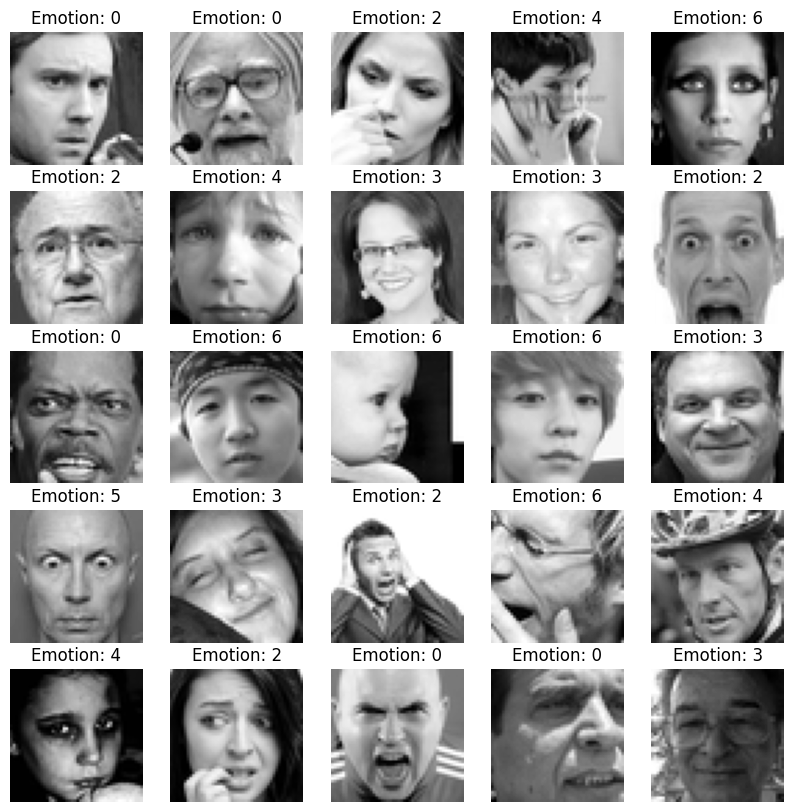

In [ ]:
# Extract pixel values and emotion labels
pixels = df['pixels'].values
emotions = df['emotion'].values

# Convert pixel values from string to numeric
pixels = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])

# Reshape the pixel values to their original image dimensions
images = pixels.reshape(-1, 48, 48)

# Display some sample images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Emotion: {emotions[i]}')
    ax.axis('off')

plt.show()

In [ ]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

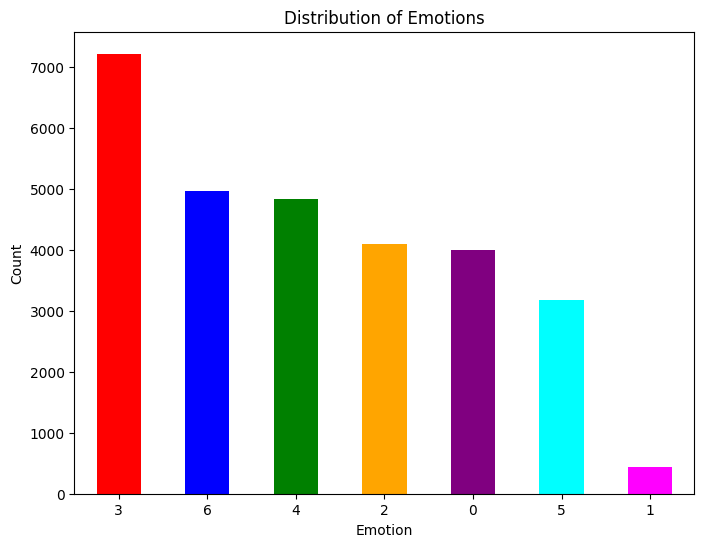

In [ ]:

# Plot emotion distribution
plt.figure(figsize=(8, 6))
emotion_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

df['emotion'].value_counts().plot(kind='bar', color=emotion_colors)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

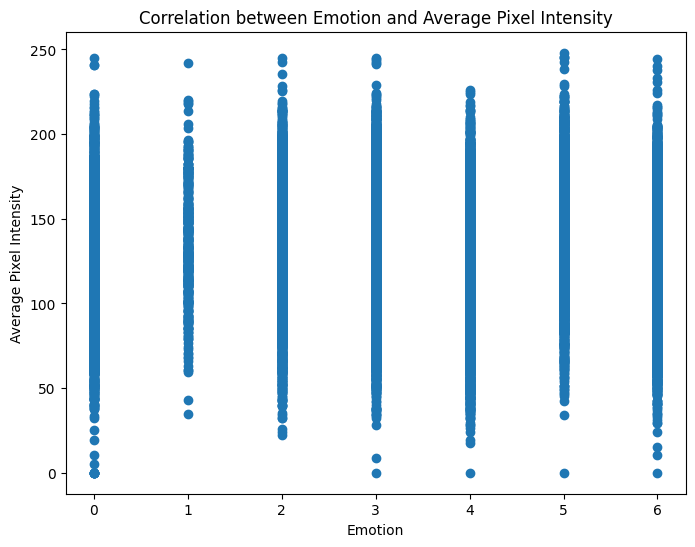

In [ ]:
# Example: Visualize correlation between emotion and average pixel intensity
plt.figure(figsize=(8, 6))
plt.scatter(df['emotion'], average_pixel_intensity)
plt.title('Correlation between Emotion and Average Pixel Intensity')
plt.xlabel('Emotion')
plt.ylabel('Average Pixel Intensity')
plt.show()

In [ ]:
df.emotion.unique()


array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}


In [ ]:
# Assuming df is your DataFrame containing the dataset

# Get the pixel values of the first image
pixel_values = df['pixels'][0].split(' ')

# Calculate the total number of pixels
num_pixels = len(pixel_values)

# Assuming the image is square, calculate the side length
side_length = int(num_pixels ** 0.5)

# Calculate the total number of pixels in the image
total_pixels = side_length ** 2

print("Total number of pixels in the image:", total_pixels)


Total number of pixels in the image: 2304


In [ ]:
math.sqrt(len(df.pixels[0].split(' ')))


48.0

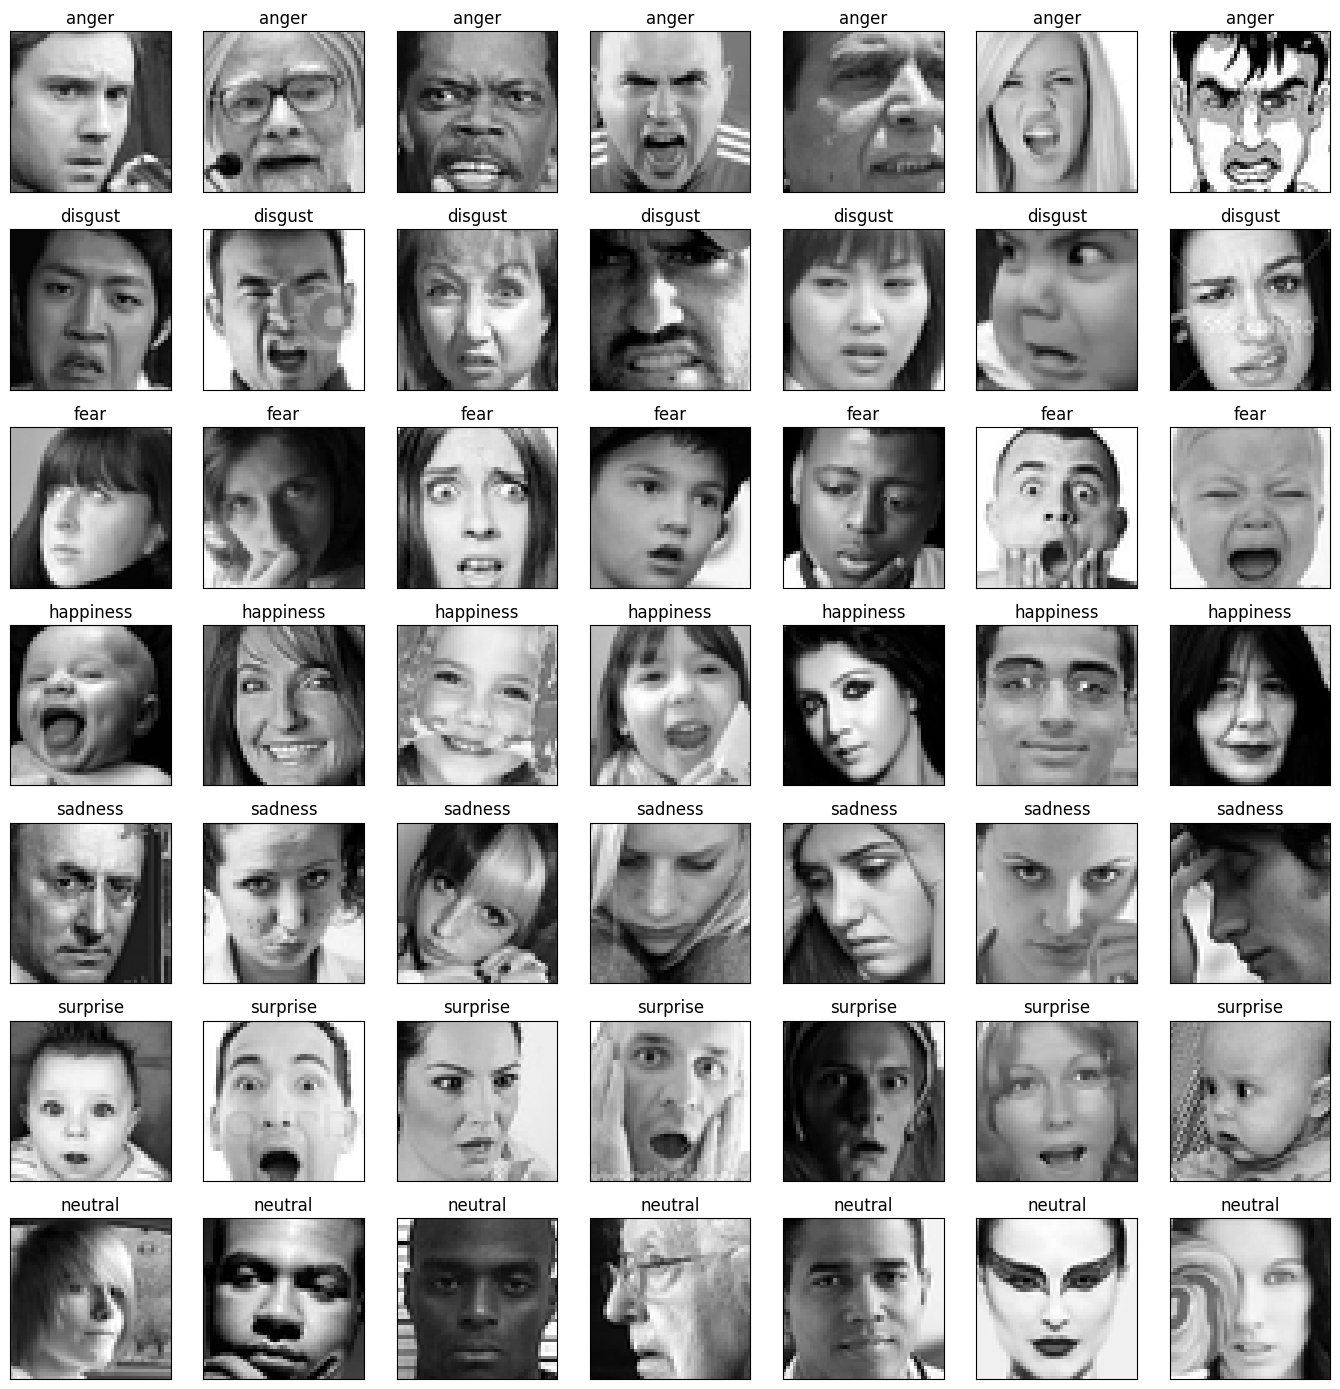

In [ ]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [ ]:
# Resize Images
def resize_images(images, target_size):
    resized_images = np.array([resize(image.reshape(48, 48), target_size, anti_aliasing=True) for image in images])
    return resized_images

In [ ]:
# Normalize Pixel Values
def normalize_images(images):
    normalized_images = images / 255.0
    return normalized_images

In [124]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images by 0 to 10 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by 10% of total width
    height_shift_range=0.1,  # randomly shift images vertically by 10% of total height
    zoom_range=0.1,  # randomly zoom into images by 10%
    horizontal_flip=True  # randomly flip images horizontally
)

In [125]:
# Extract pixel values and emotion labels
pixels = df['pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
emotions = df['emotion'].values

In [126]:
# Resize images to a common size (e.g., 64x64)
images_resized = resize_images(pixels, (64, 64))

In [127]:
# Normalize pixel values
images_normalized = normalize_images(images_resized)

In [128]:
# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images_normalized,emotions, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)